<a href="https://colab.research.google.com/github/harkpun/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> What is Cardiovascular disease? <b>

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes.

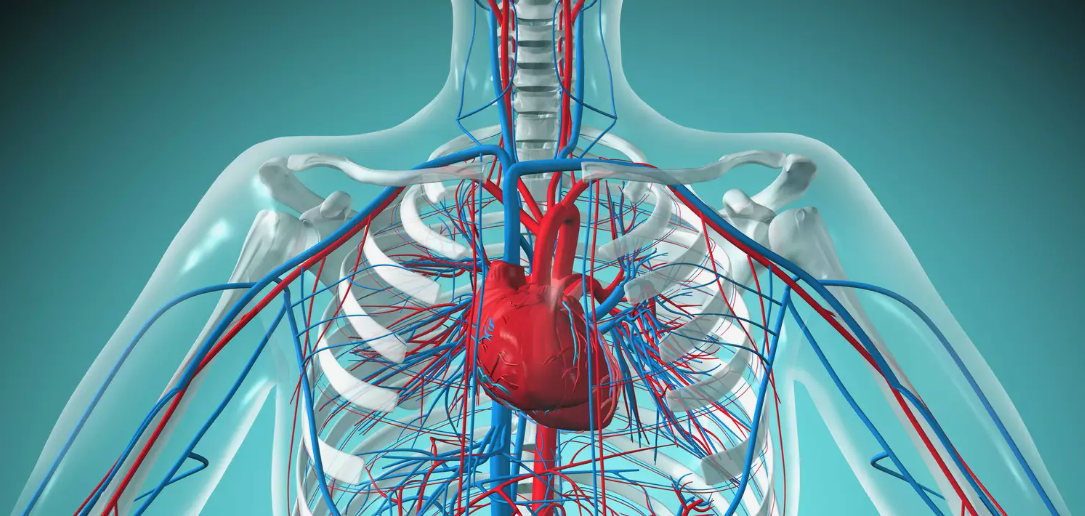


## **Data Description**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

##### **Each attribute is a potential risk factor. These attributes are demographic, behavioral and medical risk factors.**

**Attribute Informations-**

Demographic
* ***Sex***: male or female("M" or "F")
* ***Age***: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* ***is_smoking***: whether or not the patient is a current smoker ("YES" or "NO")
* ***Cigs Per Day***: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
* ***BP Meds***: whether or not the patient was on blood pressure medication (Nominal)
* ***Prevalent Stroke***: whether or not the patient had previously had a stroke (Nominal)
* ***Prevalent Hyp***: whether or not the patient was hypertensive (Nominal)
* ***Diabetes***: whether or not the patient had diabetes (Nominal)

Medical(current)
* ***Tot Chol***: total cholesterol level (Continuous)
* ***Sys BP***: systolic blood pressure (Continuous)
* ***Dia BP***: diastolic blood pressure (Continuous)
* ***BMI***: Body Mass Index (Continuous)
* ***Heart Rate***: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ***Glucose***: glucose level (Continuous)

Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [249]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Classification/data_cardiovascular_risk.csv', index_col='id')

In [184]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [185]:
df.shape

(3390, 16)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [187]:
df.duplicated().sum()

0

In [188]:
print(f'null values \n{df.isna().sum().sort_values(ascending=False)}')
print('-'*50)
print(f'% of null values \n{round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)}')

null values 
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64
--------------------------------------------------
% of null values 
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64


In [189]:
import math

In [190]:
# these are all numeric columns.
# I am going to impute 0 on these columns because these are all depend on human behavioral and medical condition. we can't take any risk over here. 
missing_value = ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']
for col in missing_value:
  df[col] = df[col].fillna(df[col].median())

print(df.isna().sum())

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [191]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [192]:
for col in df.columns:
  print(f'number of unique column in {col} is {df[col].nunique()}')
  print(f'number of unique column in {col} is {df[col].unique()}')
  print('-'*50)

number of unique column in age is 39
number of unique column in age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
--------------------------------------------------
number of unique column in education is 4
number of unique column in education is [2. 4. 1. 3.]
--------------------------------------------------
number of unique column in sex is 2
number of unique column in sex is ['F' 'M']
--------------------------------------------------
number of unique column in is_smoking is 2
number of unique column in is_smoking is ['YES' 'NO']
--------------------------------------------------
number of unique column in cigsPerDay is 32
number of unique column in cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
--------------------------------------------------
number of unique column in BPMeds is 2
number of unique column in

In [193]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
education,3390.0,1.971681,1.005925,1.00,1.00,2.00,3.0000,4.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.0000,1.0
totChol,3390.0,237.039823,44.994205,107.00,206.00,234.00,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.0000,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.0000,142.5


In [194]:
df.describe().columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [195]:
print(df.nunique())

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64


In [196]:
numeric_features = [col for col in df.columns if df[col].nunique()>5]
print(numeric_features)

category_features = [col for col in df.columns if col not in numeric_features]
print(category_features)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


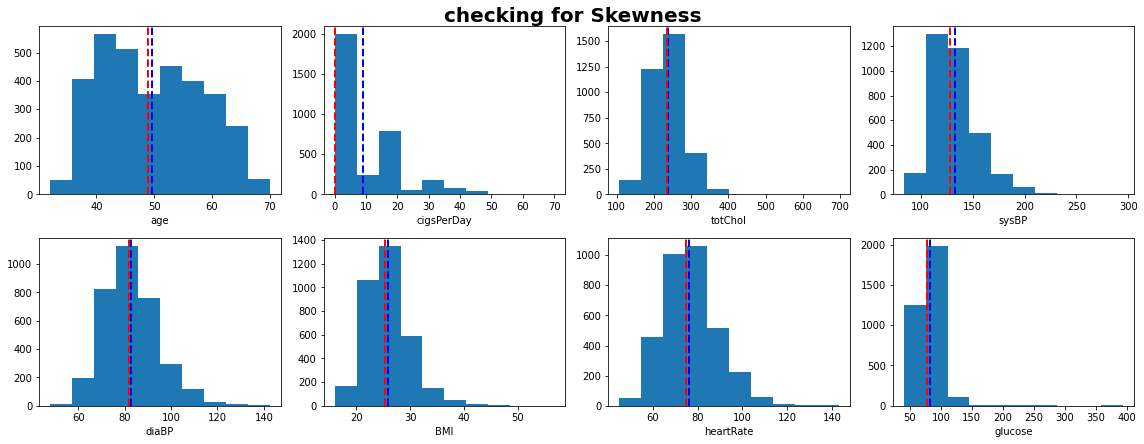

In [197]:
plt.figure(figsize=(16,6))
plt.suptitle('checking for Skewness', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2,4, i+1)
  plt.hist(df[col])
  plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col) 
  plt.tight_layout()

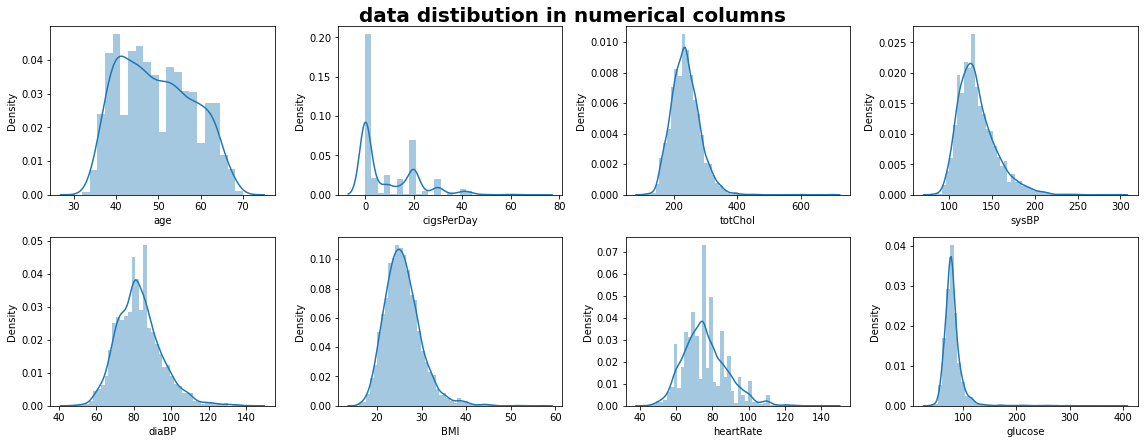

In [198]:
plt.figure(figsize=(16,6))
plt.suptitle('data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.distplot(df[col])  
  plt.xlabel(col)
  plt.tight_layout()

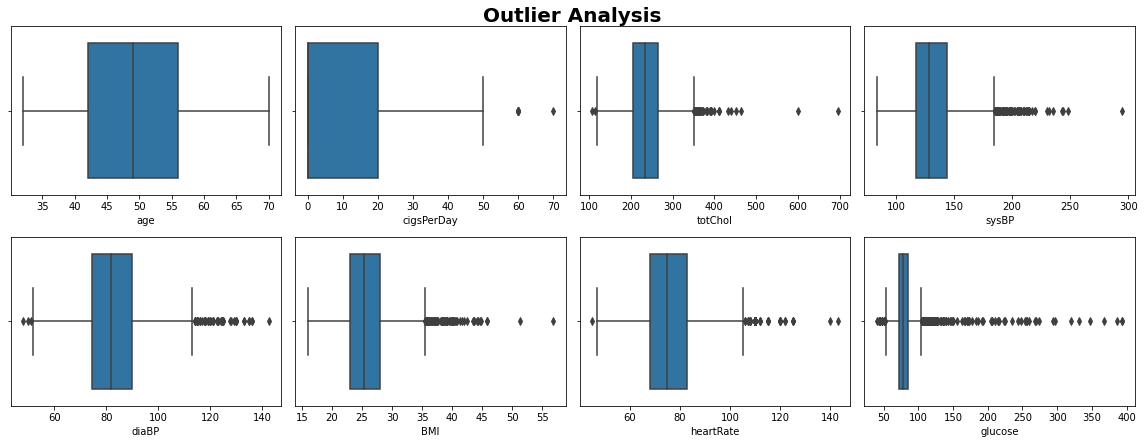

In [199]:
plt.figure(figsize=(16,6))
plt.suptitle('Outlier Analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

In [200]:
lower_bound = df['totChol'].mean() - 3*df['totChol'].std()
upper_bound = df['totChol'].mean() + 3*df['totChol'].std()
print(lower_bound)
print(upper_bound)

102.0572075855205
372.02243843217866


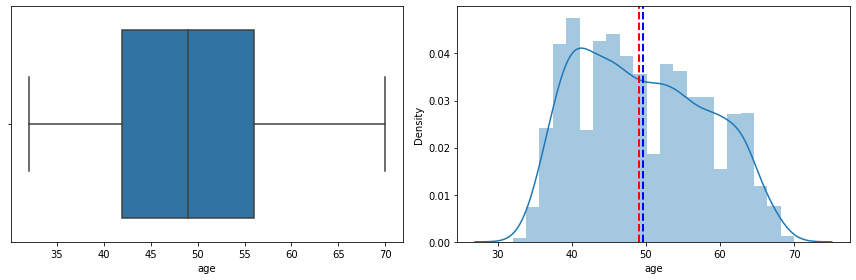

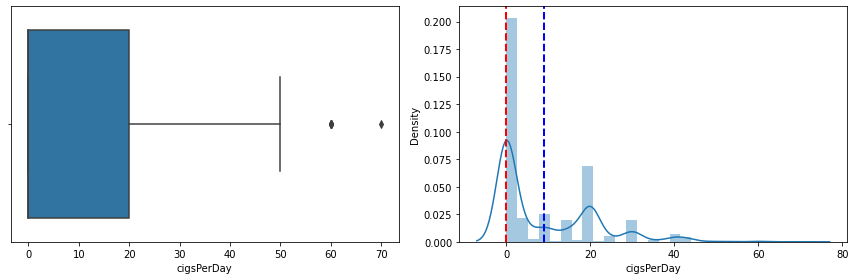

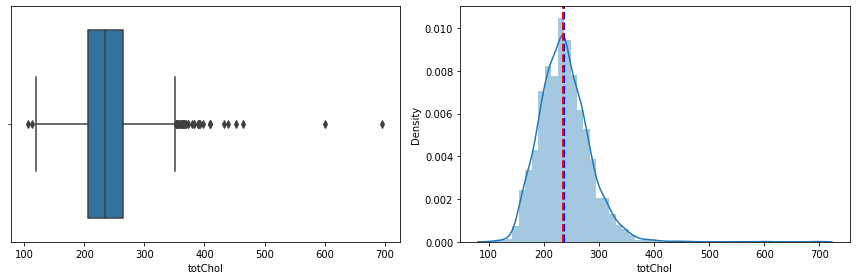

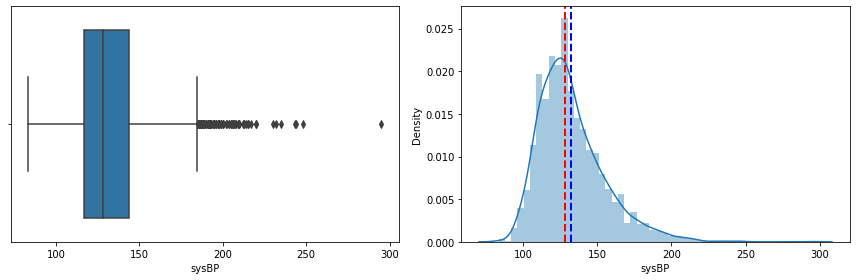

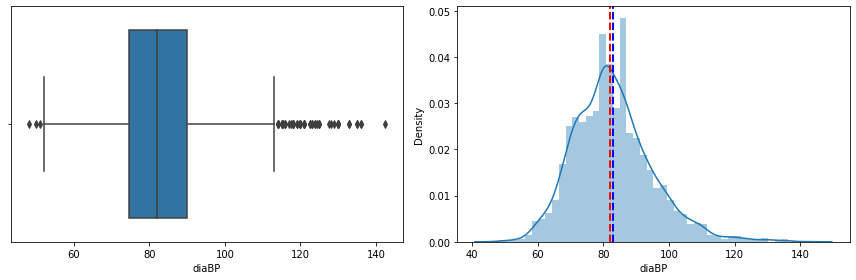

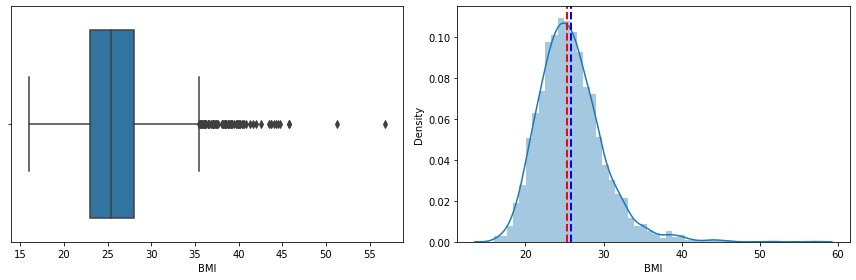

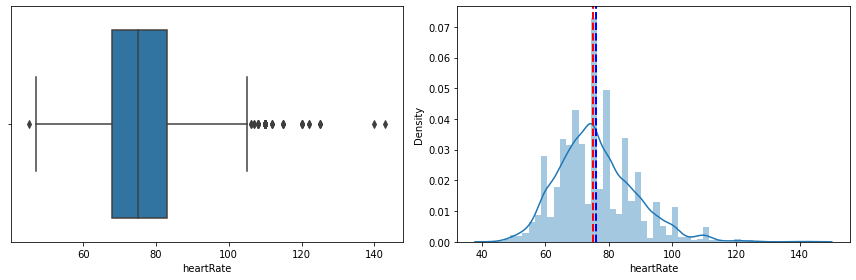

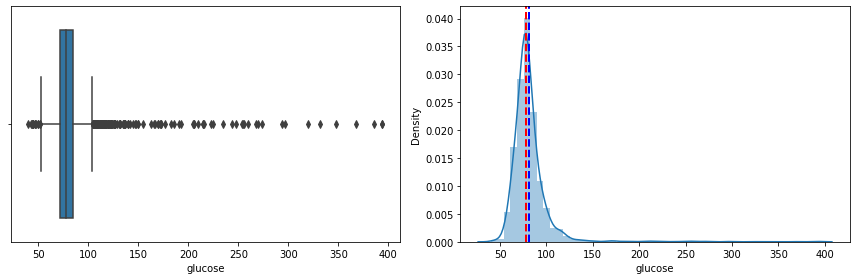

In [201]:
# checking for Outliers 
for col in numeric_features:
  fig, ax = plt.subplots(1,2, figsize=(12,4))
  sns.boxplot(df[col], ax=ax[0])
  sns.distplot(df[col], ax=ax[1])
  plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)
  plt.tight_layout()

Lets treet outlier first then check data distributuion.

In [202]:
df1 = df.copy()

for col in numeric_features:
  
  IQR = df1[col].quantile(0.75) - df1[col].quantile(0.25)
  upper_limit = df1[col].quantile(0.75) + (1.5 * IQR)
  lower_limit = df1[col].quantile(0.25) - (1.5 * IQR)
  print(f'{col} ---> upper:{upper_limit}   lower:{lower_limit}')

  # replcing with upper_limit if outlier is higher than upper_limit value. 
  df1[col] = np.where(df1[col]>upper_limit, upper_limit, df1[col])
  
  # replcing with lower_limit if outlier is lesser than lower_limit value. 
  df1[col] = np.where(df1[col]<lower_limit, lower_limit, df1[col])

age ---> upper:77.0   lower:21.0
cigsPerDay ---> upper:50.0   lower:-30.0
totChol ---> upper:351.0   lower:119.0
sysBP ---> upper:184.5   lower:76.5
diaBP ---> upper:113.25   lower:51.25
BMI ---> upper:35.44875   lower:15.578750000000005
heartRate ---> upper:105.5   lower:45.5
glucose ---> upper:104.5   lower:52.5


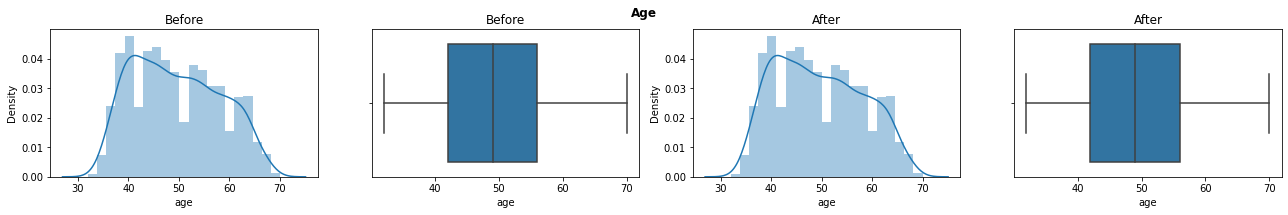

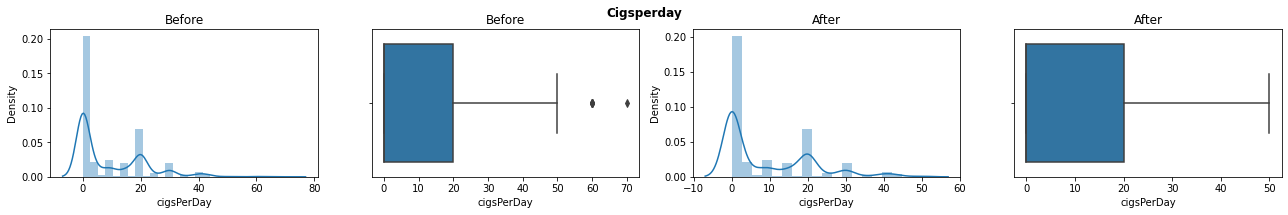

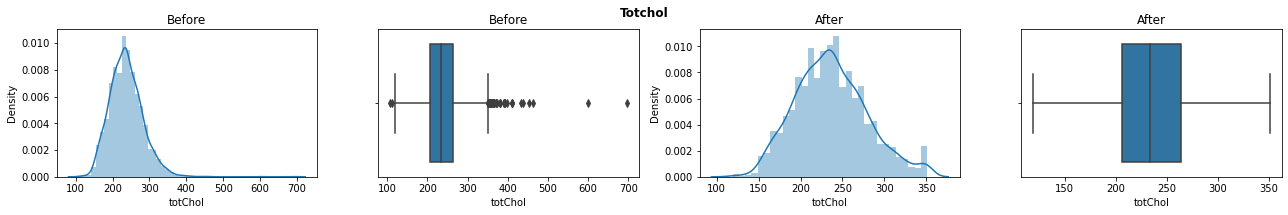

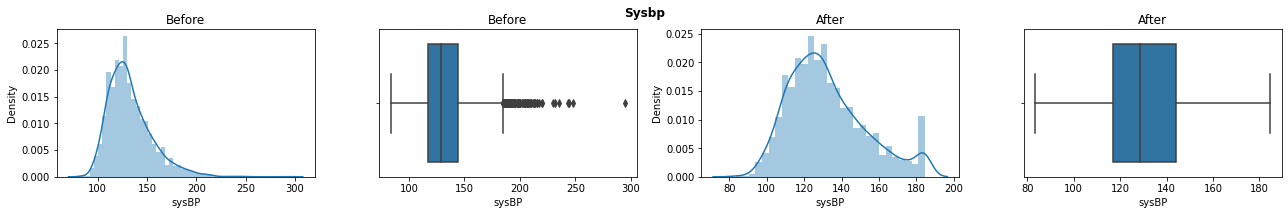

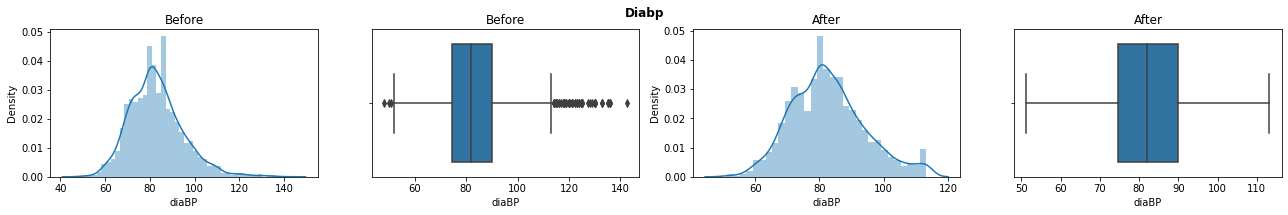

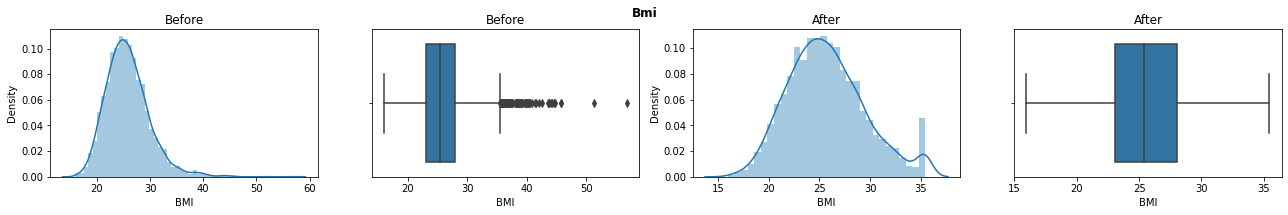

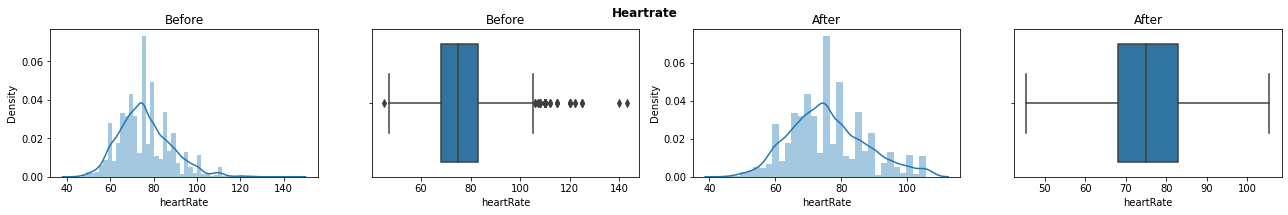

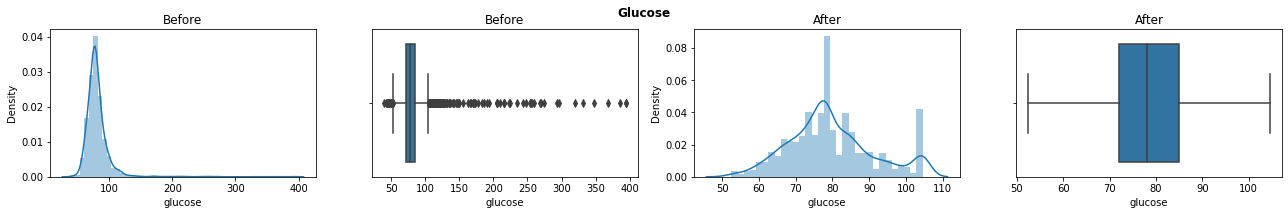

In [203]:
for col in numeric_features:
  fig, ax =plt.subplots(1,4, figsize=(18,3))
  
  # Before treating outliers 
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
  # After treating outliers
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

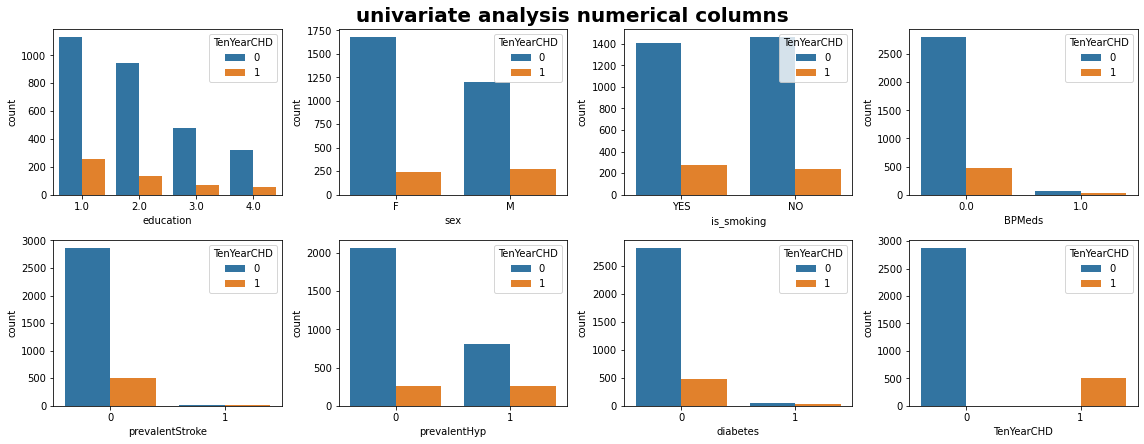

In [204]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

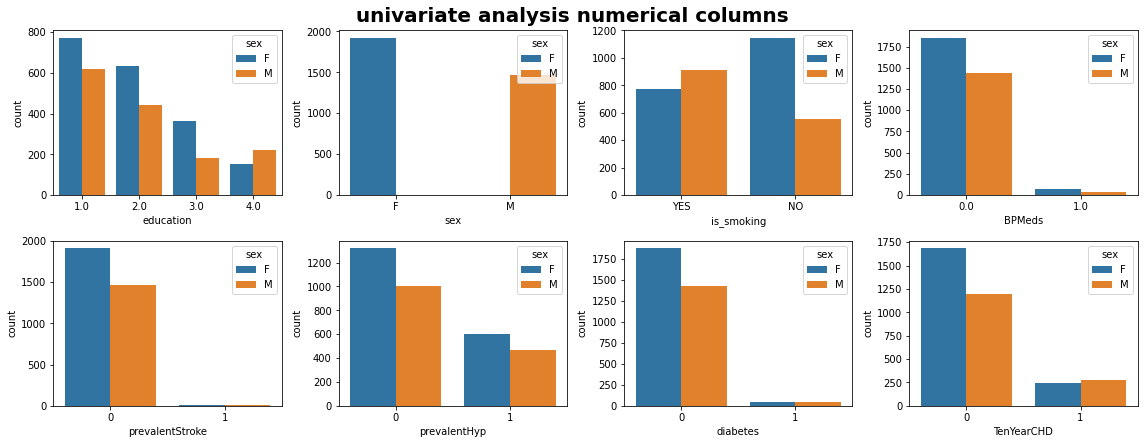

In [205]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

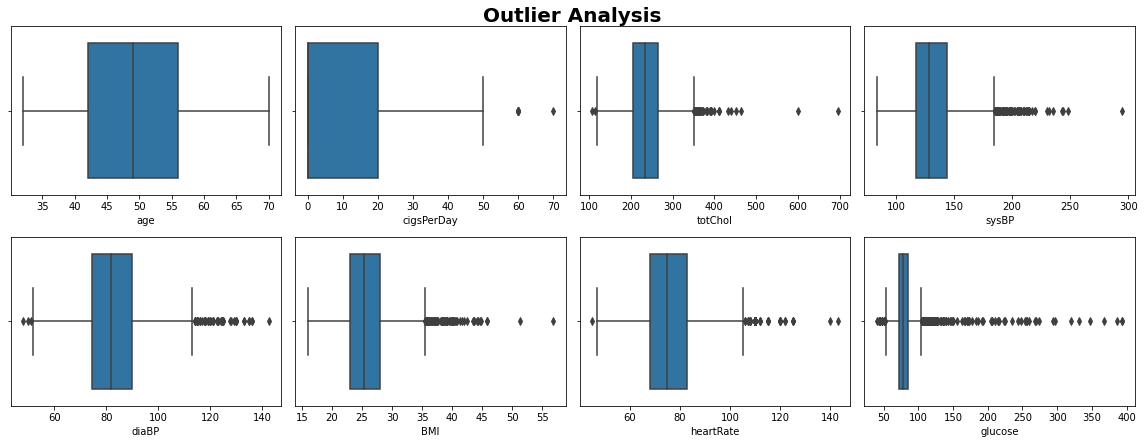

In [206]:
plt.figure(figsize=(16,6))
plt.suptitle('Outlier Analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

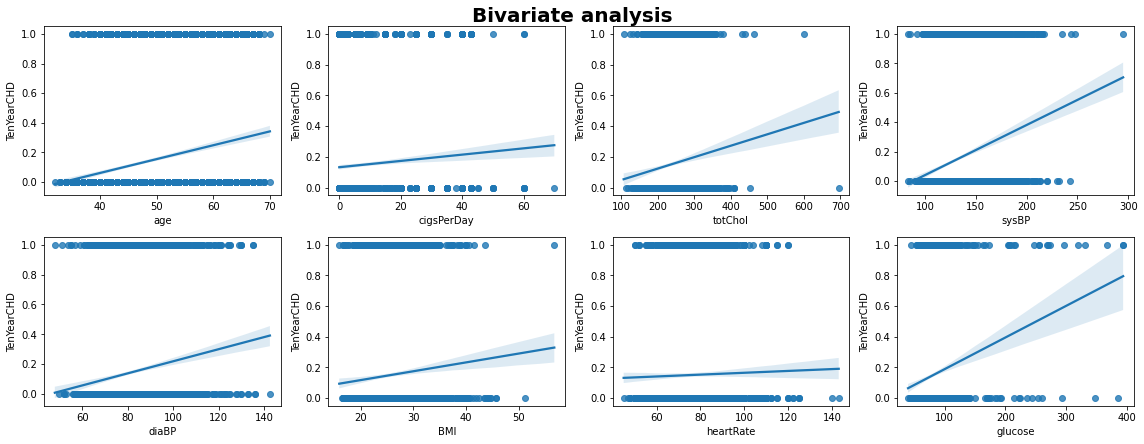

In [207]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.regplot(x=df[col], y='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

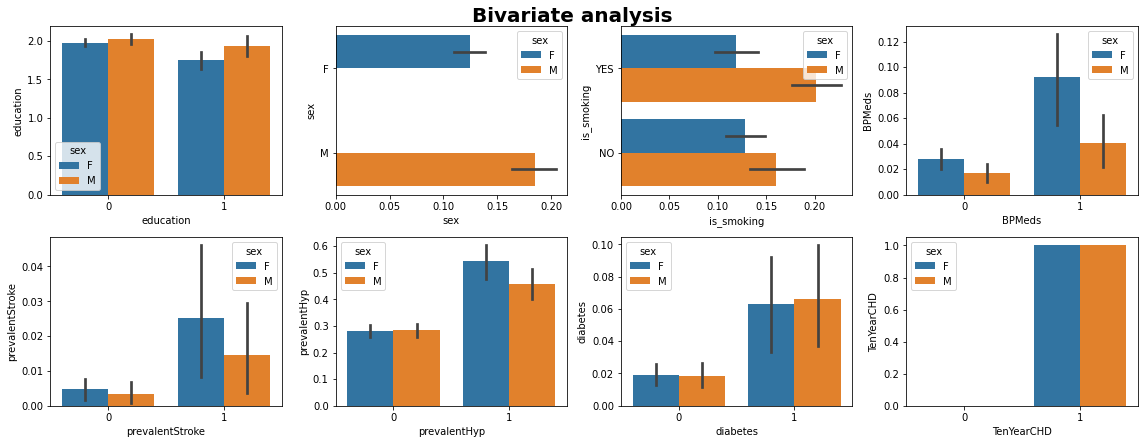

In [208]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.barplot(y=df[col], x='TenYearCHD', hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

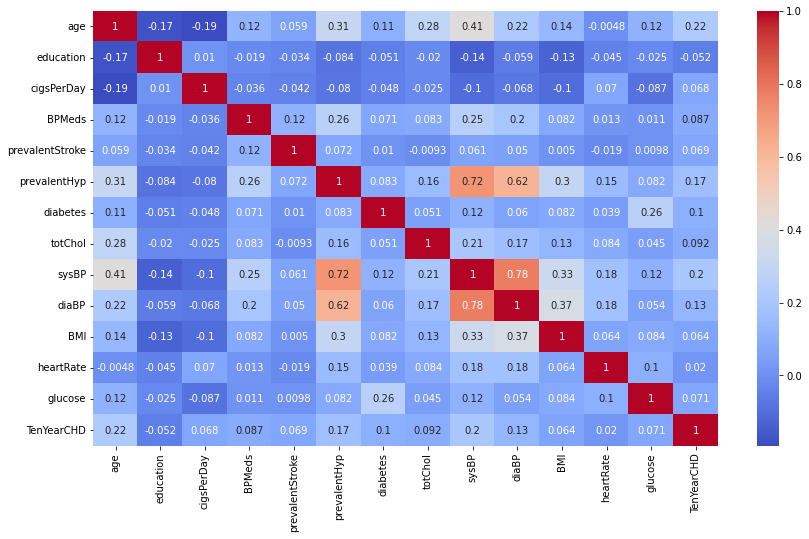

In [209]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [211]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['TenYearCHD']]])


,VIF Factor,features
0,43.451545,age
1,4.806014,education
2,1.639884,cigsPerDay
3,1.130760,BPMeds
4,1.026910,prevalentStroke
5,2.512460,prevalentHyp
6,1.092892,diabetes
7,34.144396,totChol
8,154.657320,sysBP
9,139.648314,diaBP


In [212]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['TenYearCHD','diaBP','sysBP','BMI','totChol','heartRate','glucose']]])

,VIF Factor,features
0,5.259395,age
1,4.080567,education
2,1.520818,cigsPerDay
3,1.117834,BPMeds
4,1.024945,prevalentStroke
5,1.683966,prevalentHyp
6,1.044272,diabetes


In [213]:
final_numeric_features = ['age','education','cigsPerDay','BPMeds',
                          'prevalentStroke','prevalentHyp','diabetes']

## **Encoding**

In [214]:
df1[category_features]

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
id,,,,,,,,
0,2.0,F,YES,0.0,0,0,0,1
1,4.0,M,NO,0.0,0,1,0,0
2,1.0,F,YES,0.0,0,0,0,0
3,1.0,M,YES,0.0,0,1,0,1
4,1.0,F,YES,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
3385,1.0,F,NO,0.0,0,0,0,0
3386,1.0,F,NO,0.0,0,0,0,0
3387,3.0,M,YES,0.0,0,1,0,1


In [215]:
df1['sex'] = df1['sex'].map({'M':1, 'F':0})
df1['is_smoking'] = df1['is_smoking'].map({'YES':1, 'NO':0})

In [221]:
indepedent_features = final_numeric_features + category_features
print(indepedent_features)
print(len(indepedent_features))

['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
15


In [222]:
df1[indepedent_features]

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
id,,,,,,,,,,,,,,,
0,64.0,2.0,3.0,0.0,0,0,0,2.0,0,1,0.0,0,0,0,1
1,36.0,4.0,0.0,0.0,0,1,0,4.0,1,0,0.0,0,1,0,0
2,46.0,1.0,10.0,0.0,0,0,0,1.0,0,1,0.0,0,0,0,0
3,50.0,1.0,20.0,0.0,0,1,0,1.0,1,1,0.0,0,1,0,1
4,64.0,1.0,30.0,0.0,0,0,0,1.0,0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.0,0,0,0,0
3386,46.0,1.0,0.0,0.0,0,0,0,1.0,0,0,0.0,0,0,0,0
3387,44.0,3.0,3.0,0.0,0,1,0,3.0,1,1,0.0,0,1,0,1


In [223]:
X = df1[indepedent_features]
y = df1['TenYearCHD']

In [225]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print(X_train.shape)
print(X_test.shape)

(2542, 15)
(848, 15)


In [228]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
from sklearn.linear_model import LogisticRegression

In [252]:
lr = LogisticRegression().fit(X_train,y_train)

In [253]:
print(f'train data score : {lr.score(X_train, y_train)}')
print(f'test data score : {lr.score(X_test, y_test)}')

train data score : 1.0
test data score : 1.0


In [254]:
X.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

In [256]:
lr.coef_

array([[ 0.21728621, -0.01741392,  0.0937486 ,  0.02421397,  0.02062357,
         0.0614292 ,  0.03506392, -0.01741392,  0.04765858,  0.06700164,
         0.02421397,  0.02062357,  0.0614292 ,  0.03506392,  4.50393631]])

In [257]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [260]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [264]:
confusion_matrix(y_test, test_class_preds)

array([[726,   0],
       [  0, 122]])